# Two sample permutation test of respiratory phase angles
This notebook runs permutation tests to compare two samples of respiratory phase angles. This is useful when you want to compare the phase angles of two different conditions or groups.

In [1]:
import pickle
import numpy as np
from pathlib import Path
import math
import matplotlib.pyplot as plt


from pyriodic.circular import Circular
from pyriodic.viz import CircPlot
from pyriodic.permutation import permutation_test_between_samples

## Single-level analysis


In [2]:
data_path = Path("../../data/respiration/intermediate")
subj_id = "0019"
file_path = data_path / f"participant_{subj_id}_preproc.pkl"

with open(file_path, 'rb') as f:
            data = pickle.load(f)

PA_events = data["phase_angle_events"]
PA = data["phase_angles"]


## Choosing events of interest and plotting the two samples

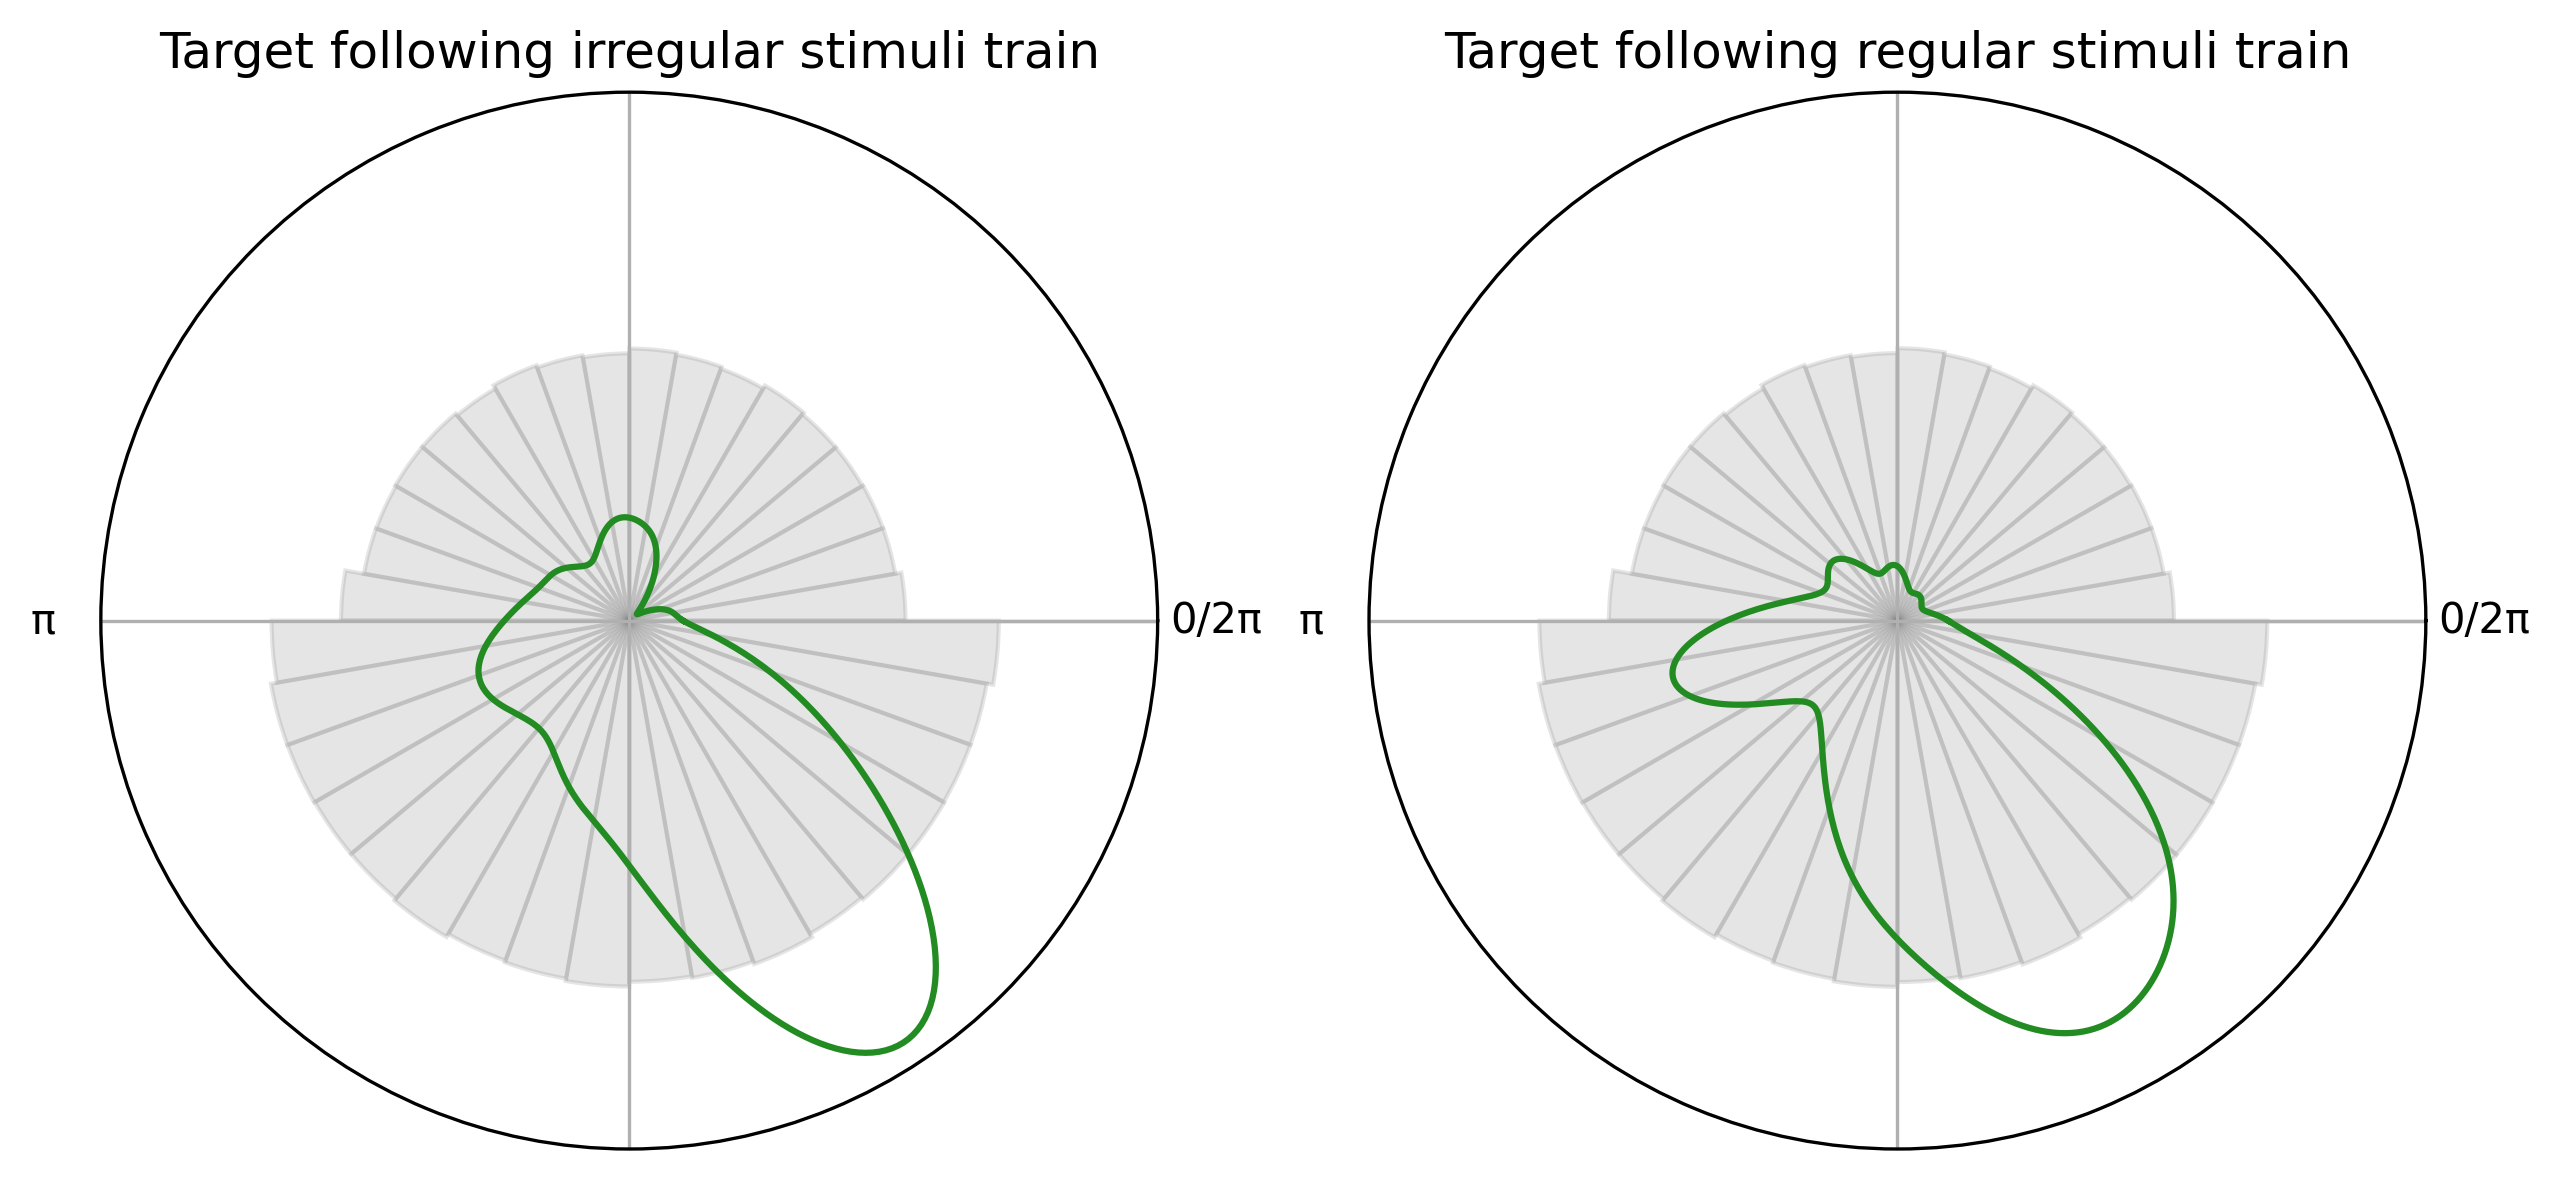

In [3]:
irregular_targets = PA_events.to_circular(include="target/irregular")
regular_targets = PA_events.to_circular(include="target/regular")

fig, axes = plt.subplots(1, 2, dpi = 300, figsize = (10, 6), subplot_kw={"projection": "polar"}, sharey=True)

irregular_plot = CircPlot(
    irregular_targets, 
    title = "Target following irregular stimuli train",
    group_by_labels=False, 
    ax=axes[0]
)
irregular_plot.add_density()
irregular_plot.add_histogram(PA)


regular_plot = CircPlot(
    regular_targets, 
    title = "Target following regular stimuli train",
    group_by_labels=False, 
    ax=axes[1]
)
regular_plot.add_density()
regular_plot.add_histogram(PA)

In [4]:
# Run permutation test
obs_stat, pval = permutation_test_between_samples(
    irregular_targets.data,
    regular_targets.data,
    n_permutations= 10000
)

Observed statistic = 0.023, p = 0.7272


## Another example where there is a difference between the two samples

Observed statistic = 0.781, p = 0.0001


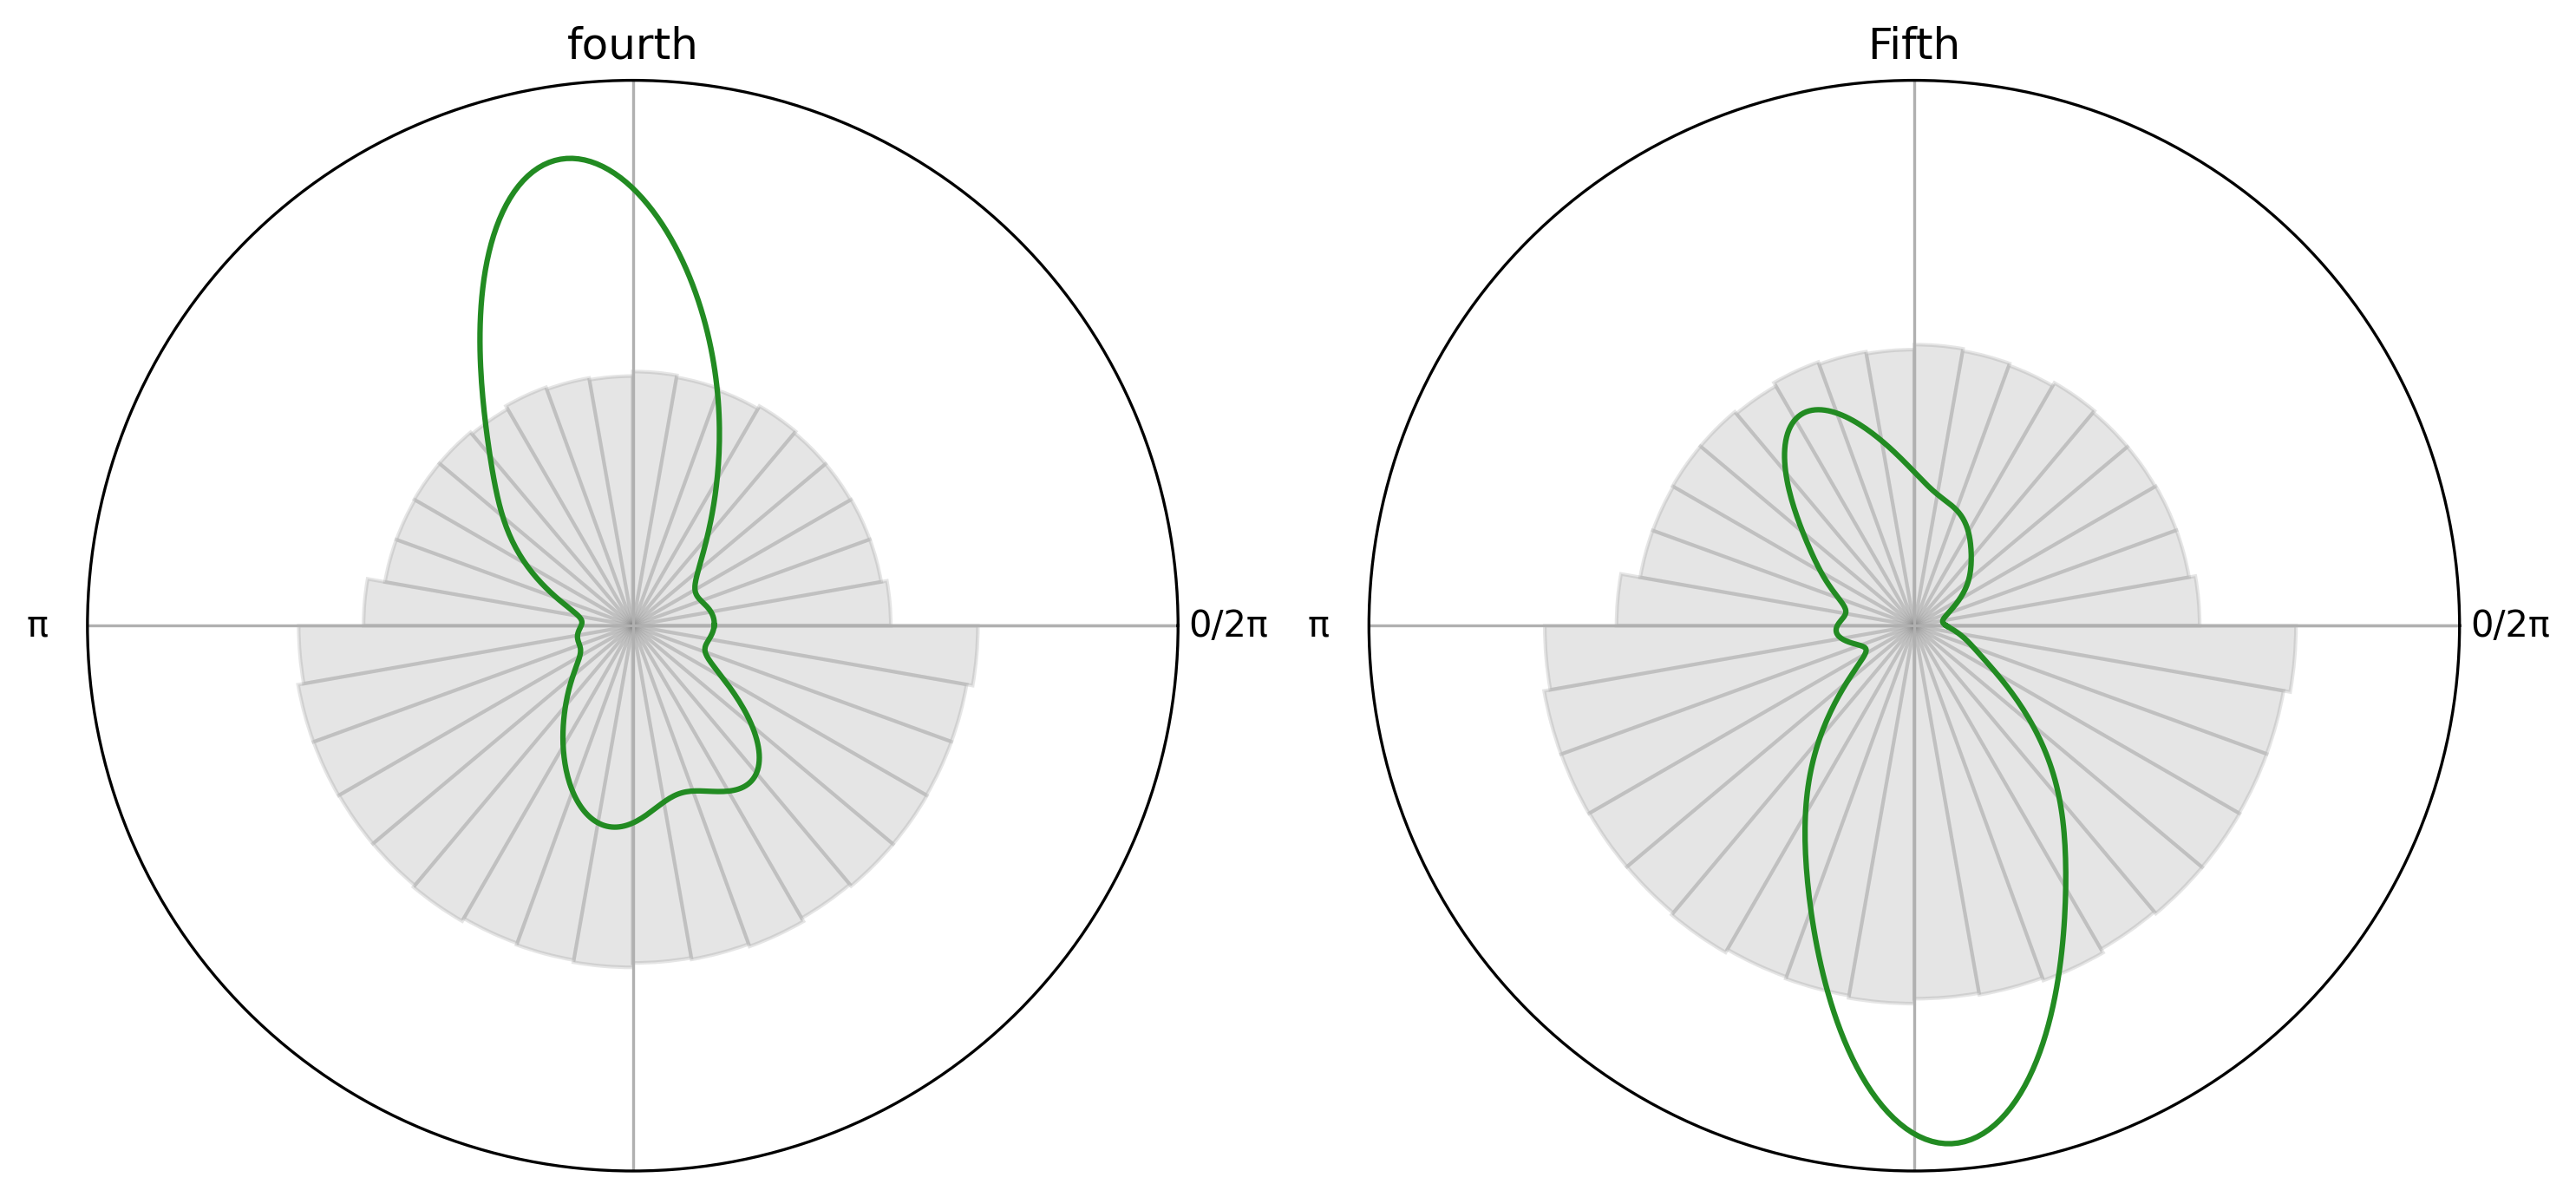

In [5]:

fourth_salient = PA_events.to_circular(include="salient/fourth")
fifth_salient = PA_events.to_circular(include="salient/fifth")


fig, axes = plt.subplots(1, 2, dpi = 300, figsize = (10, 6), subplot_kw={"projection": "polar"}, sharey=True, sharex=True)

fourth_plot = CircPlot(
    fourth_salient, 
    title="fourth",
    group_by_labels=False, 
    ax=axes[0]
)
fourth_plot.add_density()
fourth_plot.add_histogram(PA)



fifth_plot = CircPlot(
    fifth_salient, 
    title="Fifth",
    group_by_labels=False, 
    ax=axes[1]
)
fifth_plot.add_density()
fifth_plot.add_histogram(PA)

plt.tight_layout()

# Run permutation test
obs_stat, pval = permutation_test_between_samples(
    fourth_salient.data,
    fifth_salient.data,
    n_permutations= 10000,
)